A guy created and uploaded the Kaggle dataset https://www.kaggle.com/datasets/vstepanenko/disaster-tweets <br>
They used common keywords like “crash”, “quarantine”, and “bush fires” to perform search for those tweets. <br>
They collected 11,000 tweets.<br>
Then, they presented a problem to the community to identify if the tweet was real disaster or a joke with the word or a movie review or something non-disastrous.

![](./disaster-tweets.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(style="seaborn")

In [2]:
train = pd.read_csv('lesson4-disaster-tweets/train.csv')
test = pd.read_csv('lesson4-disaster-tweets/test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.head().T

,0,1,2,3,4
id,1,4,5,6,7
keyword,NaN,NaN,NaN,NaN,NaN
location,NaN,NaN,NaN,NaN,NaN
text,Our Deeds are the Reason of this #earthquake M...,Forest fire near La Ronge Sask. Canada,All residents asked to 'shelter in place' are ...,"13,000 people receive #wildfires evacuation or...",Just got sent this photo from Ruby #Alaska as ...
target,1,1,1,1,1


In [5]:
test.head().T

,0,1,2,3,4
id,0,2,3,9,11
keyword,NaN,NaN,NaN,NaN,NaN
location,NaN,NaN,NaN,NaN,NaN
text,Just happened a terrible car crash,"Heard about #earthquake is different cities, s...","there is a forest fire at spot pond, geese are...",Apocalypse lighting. #Spokane #wildfires,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train.fillna(-99, inplace=True)
test.fillna(-99, inplace=True)

In [7]:
train.keyword.value_counts()[:5]

keyword
-99           61
fatalities    45
deluge        42
armageddon    42
sinking       41
Name: count, dtype: int64

In [8]:
train.location.value_counts()[:5]

location
-99              2533
USA               104
New York           71
United States      50
London             45
Name: count, dtype: int64

In [9]:
disasters = train[train.target == 1].shape[0]
non_disasters = train[train.target == 0].shape[0]

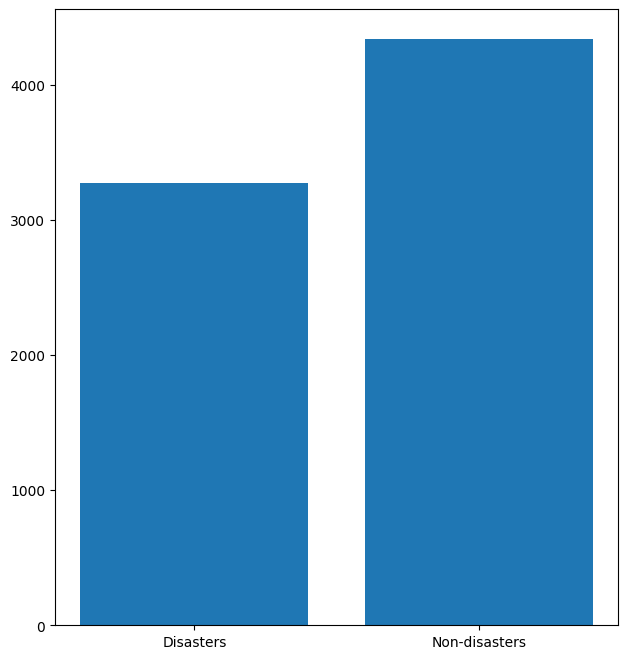

In [10]:
plt.figure(1,figsize=(16,8))
plt.subplot(1,2,1)
_ = plt.bar(['Disasters', 'Non-disasters'], [disasters, non_disasters])

In [11]:
def plot_target_based_features(feature):
    x1 = train[train.target == 1][feature]
    x2 = train[train.target == 0][feature]
    plt.figure(1, figsize=(16,8))
    plt.subplot(1,1,1)
    _ = plt.hist(x2, alpha=0.5, color="grey", bins=50)
    _ = plt.hist(x1, alpha=0.7, color="red", bins=50)
    return _

In [12]:
train["text_len"] = train.text.map(lambda x: len(x))

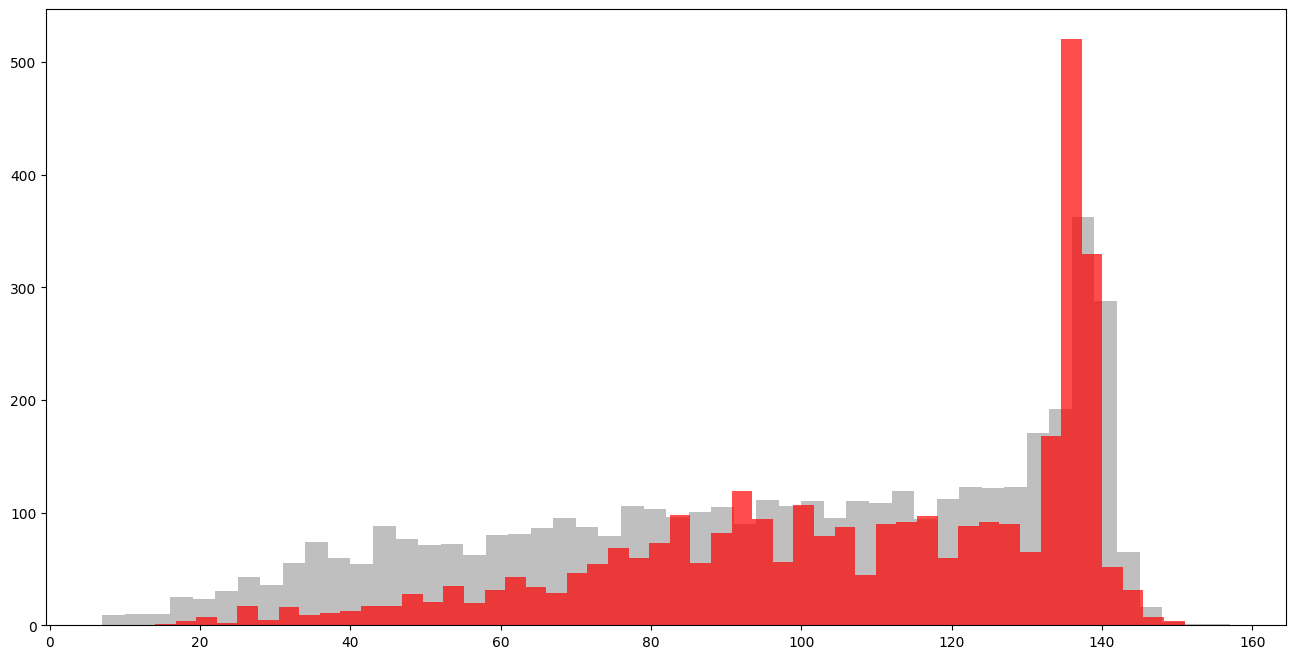

In [13]:
_ = plot_target_based_features("text_len")

In [14]:
train["words_count"] = train.text.str.split().map(lambda x: len(x))

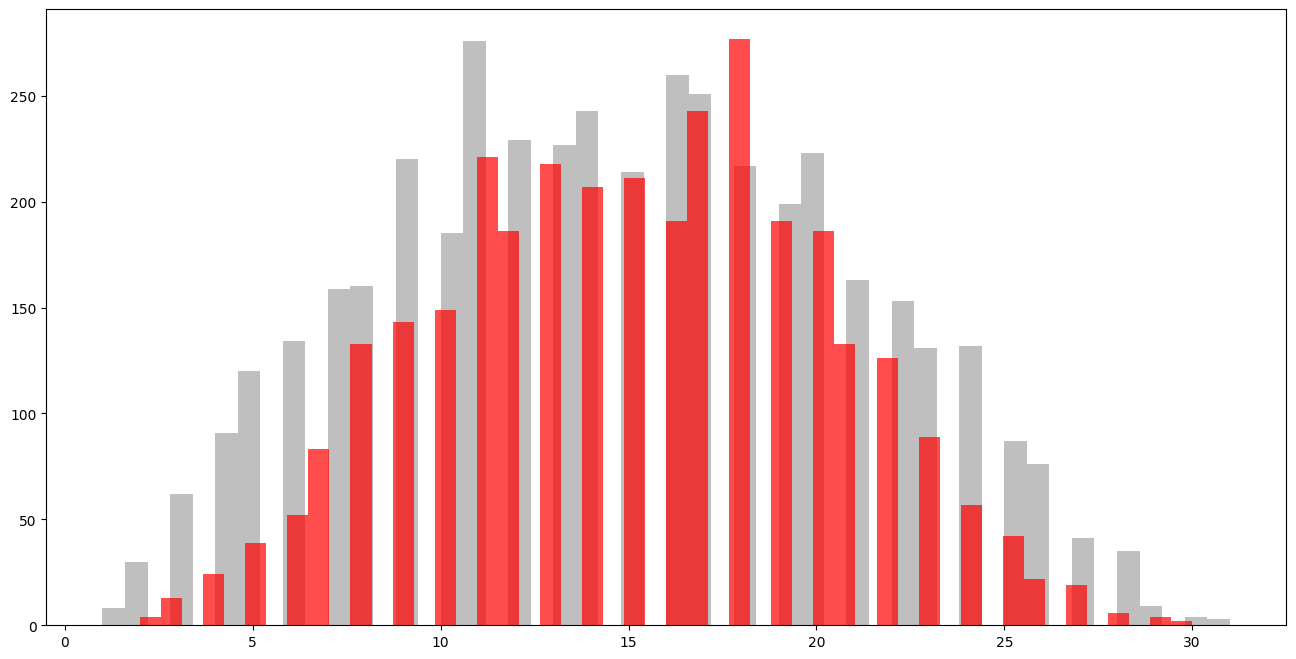

In [15]:
_ = plot_target_based_features("words_count")

In [16]:
train["unique_word_count"] = train.text.map(lambda x: len(set(str(x).split())))

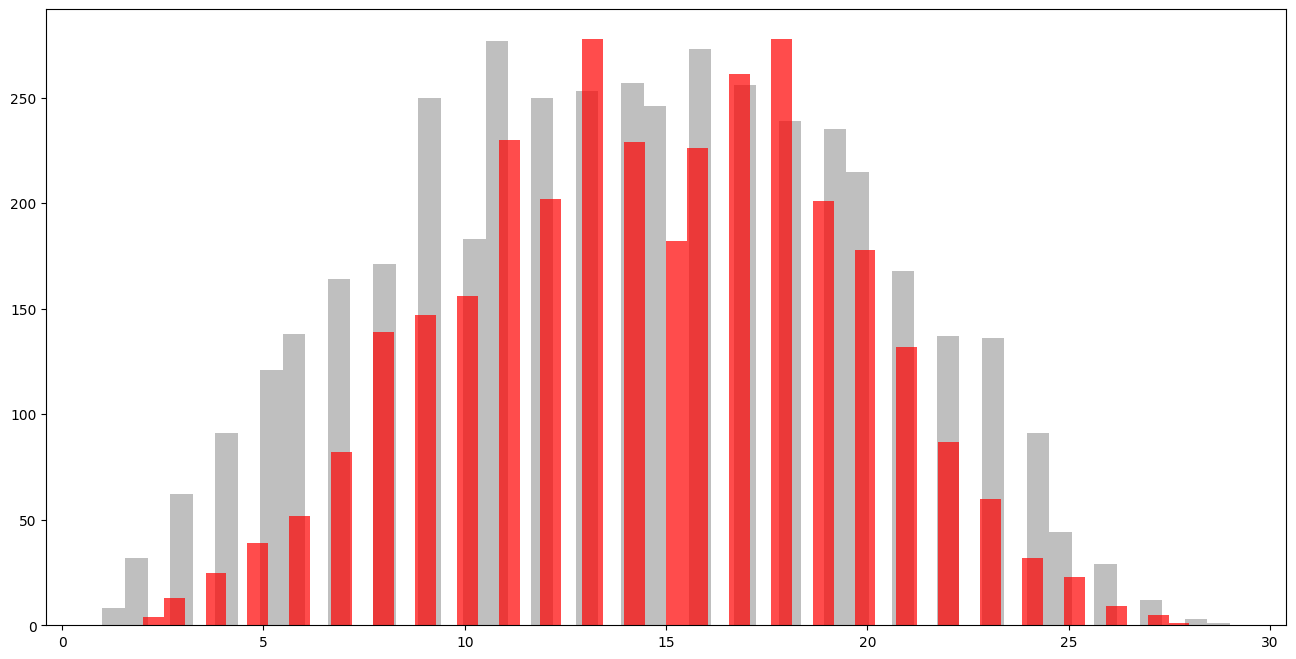

In [17]:
_ = plot_target_based_features("unique_word_count")

In [18]:
train['mean_word_length'] = train.text.map(
    lambda x: np.mean([len(w) for w in str(x).split()])
)

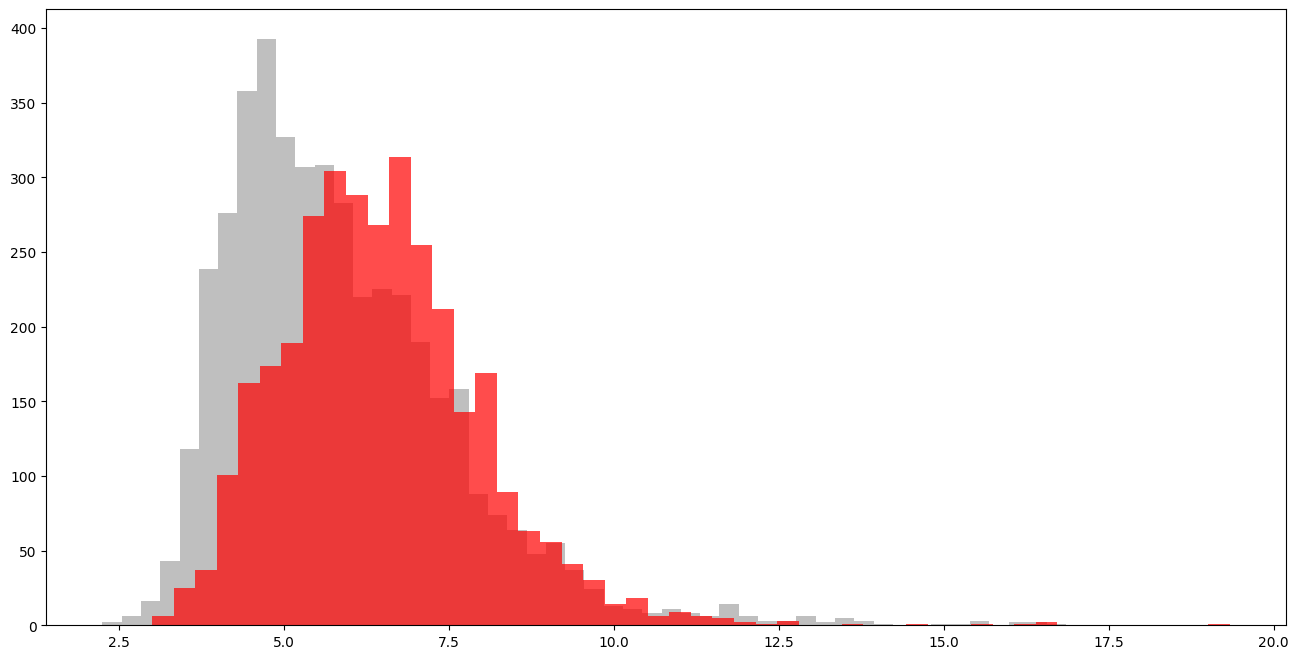

In [19]:
_ = plot_target_based_features("mean_word_length")

In [20]:
import string

train['punctuation_count'] = train["text"].map(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)

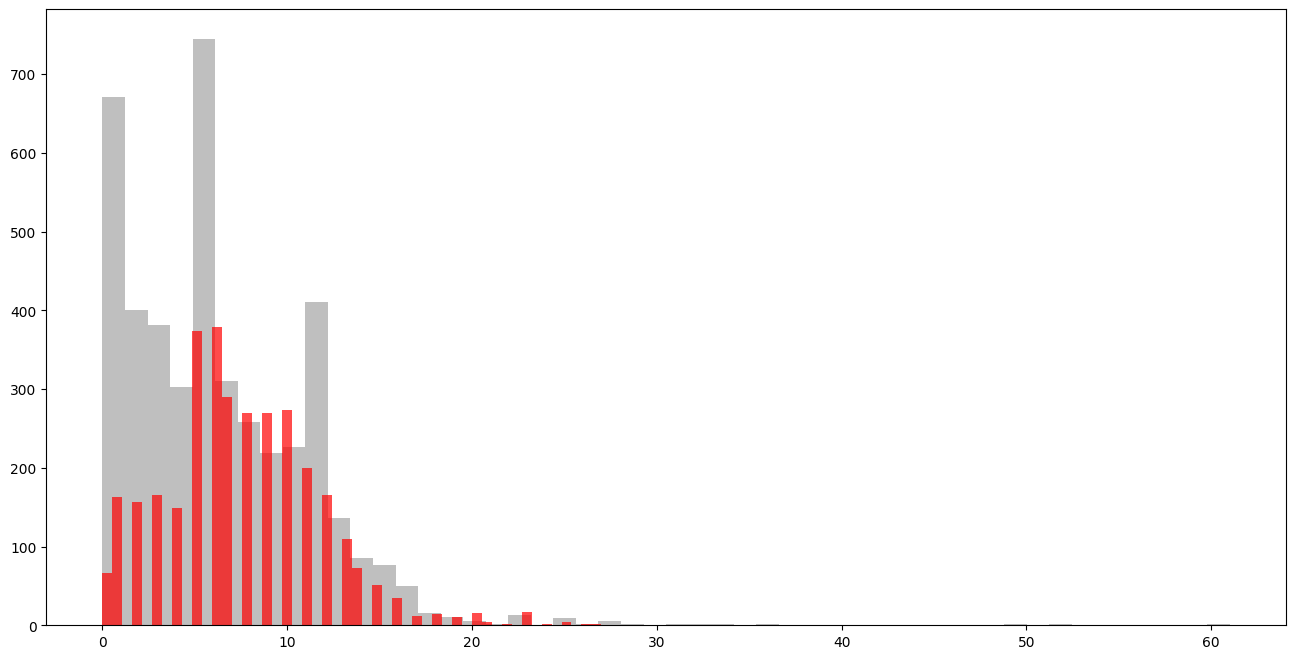

In [21]:
_ = plot_target_based_features("punctuation_count")